In [1]:
#Library import
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
#Data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [3]:
#Get tweet data
log = pd.read_csv('Login.csv')

In [4]:
#API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]

In [5]:
#Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Acces token and acces token secret
authenticate.set_access_token(accesToken, accesTokenSecret)

#API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [7]:
#Gather 200 tweets about a theme filtering retweets
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q = search_term, lang = 'en', since = '2018-11-01', tweet_mode = 'extended').items(2000)

#Store the tweets in a variable and get full text
all_tweets = [tweet.full_text for tweet in tweets]

In [10]:
#Create a dataframe to store the tweets
df = pd.DataFrame(all_tweets, columns=['Tweets'])

df.head(5)

,Tweets
0,Exactly. Base layer money is clearly done best...
1,Lithosphere is the next-generation platform fo...
2,I play and get Cashback! 🤑 The more you play o...
3,USDT/ETM (Bittrex) gained 14.61% in the last 2...
4,"""call me"" tweets = 💯 because they are not unli..."


In [14]:
def cleanTwt(twt):
  twt = re.sub(r'@[A-Za-z0-9]+', ' ', twt) #to remove @ mentions
  twt = re.sub(r'#', ' ', twt) #removes the # symbol
  twt = re.sub(r'RT[\s]+', ' ', twt) #removes retweet rt
  twt = re.sub(r'https?:\/\/\S+', ' ', twt) #removes hyperlinks

  return twt

In [16]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

df

,Tweets,Cleaned_Tweets
0,Exactly. Base layer money is clearly done best...,Exactly. Base layer money is clearly done best...
1,Lithosphere is the next-generation platform fo...,Lithosphere is the next-generation platform fo...
2,I play and get Cashback! 🤑 The more you play o...,I play and get Cashback! 🤑 The more you play o...
3,USDT/ETM (Bittrex) gained 14.61% in the last 2...,USDT/ETM (Bittrex) gained 14.61% in the last 2...
4,"""call me"" tweets = 💯 because they are not unli...","""call me"" tweets = 💯 because they are not unli..."
...,...,...
1995,linkedin twitter facebook instagram tikto...,linkedin twitter facebook instagram tikto...
1996,business businesses tips businessman busi...,business businesses tips businessman busi...
1997,Blockchain incubator Launchpool Labs announces...,Blockchain incubator Launchpool Labs announces...
1998,Individual Investors Responsible for Crypto Re...,Individual Investors Responsible for Crypto Re...


In [17]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#Create 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe
df

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,Exactly. Base layer money is clearly done best...,Exactly. Base layer money is clearly done best...,0.561111,0.100000
1,Lithosphere is the next-generation platform fo...,Lithosphere is the next-generation platform fo...,0.400000,0.000000
2,I play and get Cashback! 🤑 The more you play o...,I play and get Cashback! 🤑 The more you play o...,0.633333,-0.083333
3,USDT/ETM (Bittrex) gained 14.61% in the last 2...,USDT/ETM (Bittrex) gained 14.61% in the last 2...,0.066667,0.000000
4,"""call me"" tweets = 💯 because they are not unli...","""call me"" tweets = 💯 because they are not unli...",0.350000,0.400000
...,...,...,...,...
1995,linkedin twitter facebook instagram tikto...,linkedin twitter facebook instagram tikto...,0.000000,0.000000
1996,business businesses tips businessman busi...,business businesses tips businessman busi...,0.000000,0.000000
1997,Blockchain incubator Launchpool Labs announces...,Blockchain incubator Launchpool Labs announces...,0.333333,0.250000
1998,Individual Investors Responsible for Crypto Re...,Individual Investors Responsible for Crypto Re...,0.325000,-0.062500


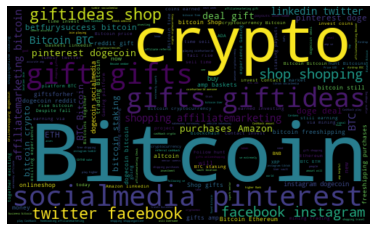

In [18]:
#Plot Text Clouds
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [19]:
#Function to cumpute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Analysis
0,Exactly. Base layer money is clearly done best...,Exactly. Base layer money is clearly done best...,0.561111,0.100000,Positive
1,Lithosphere is the next-generation platform fo...,Lithosphere is the next-generation platform fo...,0.400000,0.000000,Neutral
2,I play and get Cashback! 🤑 The more you play o...,I play and get Cashback! 🤑 The more you play o...,0.633333,-0.083333,Negative
3,USDT/ETM (Bittrex) gained 14.61% in the last 2...,USDT/ETM (Bittrex) gained 14.61% in the last 2...,0.066667,0.000000,Neutral
4,"""call me"" tweets = 💯 because they are not unli...","""call me"" tweets = 💯 because they are not unli...",0.350000,0.400000,Positive
...,...,...,...,...,...
1995,linkedin twitter facebook instagram tikto...,linkedin twitter facebook instagram tikto...,0.000000,0.000000,Neutral
1996,business businesses tips businessman busi...,business businesses tips businessman busi...,0.000000,0.000000,Neutral
1997,Blockchain incubator Launchpool Labs announces...,Blockchain incubator Launchpool Labs announces...,0.333333,0.250000,Positive
1998,Individual Investors Responsible for Crypto Re...,Individual Investors Responsible for Crypto Re...,0.325000,-0.062500,Negative


In [20]:
#Print positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Exactly. Base layer money is clearly done best by  Bitcoin and none can compete on this.  

2) "call me" tweets = 💯 because they are not unlike the digital pretzel NFTs I sell for  Tezos /  titcoin /  bitcoin  lol amirite  

3)  BITCOIN PUMP CRYPTO  ETHEREUM PUMP CRYPTO 
 RIPPLE  XRP PUMP
 SaudiArabia CENTRAL BANK and RIPPLE perfect.  

4) Incredible to see Canadians from coast to coast adopting  Bitcoin rewards as their new favorite shopping incentive. Coinmiles ranked 36th most popular financial app in the country today, right next to well established companies. 😮🙌  

5)   good project, hopefully in the future it can be even more successful for the team
Fly to the moon🚀🚀🚀🚀🚀

  
  
  

 Giveaway  Giveaways  GiveawayInspector  BSC  BUSD  Airdrop  Airdrops  Crypto  Bitcoin

6) High bullish candlestick with Volume and liquidity filter    prorealtime  trading  markets  stockmarket  trader  stocks  investing  money  forex  bitcoin  cryptocurrency  finance  prorealtime

7) $DOGE Update!!

In [21]:
#Print negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) I play and get Cashback! 🤑 The more you play on   - the higher Rank and Cashback amount you will get! My Username: User64716  betfurysuccess  bitcoin  staking

2) I play and get Cashback! 🤑 The more you play on   - the higher Rank and Cashback amount you will get! My Username: User267127   betfurysuccess  bitcoin  staking

3)   August 21,2021. I will buy 1 million Satoshi.  Howaboutu?   
In Ode to ♾/21M  BitcoinInfinityDay 
  
For I am Satoshi Nakamoto.
Nobody Fucking Sell.
 Bitcoin  

4)  Bitcoin just chilling at this 46K support...like....  

5)   Does  bitcoin render the Fed useless?

6) I play and get Cashback! 🤑 The more you play on   - the higher Rank and Cashback amount you will get! My Username: User161142  betfurysuccess  bitcoin  staking

7) Bankers want regulate crypto space because lots of fraudster wanna scam people with fake money.
WTF "money from banks" is real money?, All I know fake money came from they at first.
 Bitcoin  cryptocurrency
 Bank

8) While i hope im wr

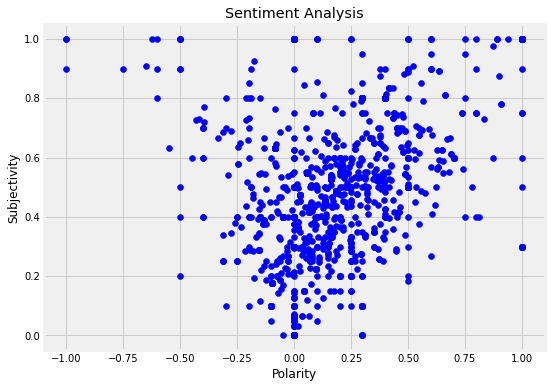

In [22]:
#Plot polarity and subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [23]:
#Plot percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(  (ptweets.shape[0] / df.shape[0]) *100 , 1)

42.7

In [24]:
#Plot percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(  (ntweets.shape[0] / df.shape[0]) *100 , 1)

12.7

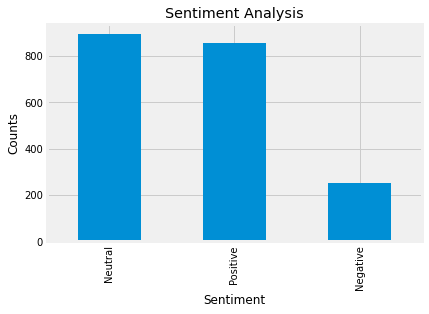

In [25]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()